In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [27]:
df=pd.read_csv('/kaggle/input/car-data/cardata.csv')
print(df.shape)
df.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

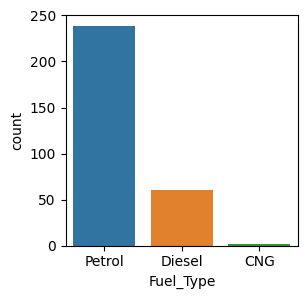

In [30]:
plt.figure(figsize=(3,3))
sns.countplot(x='Fuel_Type',data=df)
df.Fuel_Type.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

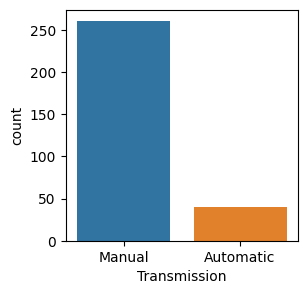

In [31]:
plt.figure(figsize=(3,3))
sns.countplot(x='Transmission',data=df)
df.Transmission.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

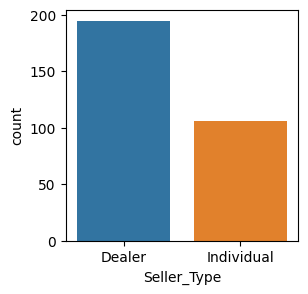

In [32]:
plt.figure(figsize=(3,3))
sns.countplot(x='Seller_Type',data=df)
df.Seller_Type.value_counts()

In [33]:
encode=LabelEncoder()
labels=encode.fit_transform(df.Fuel_Type)
df['Fuel_Type']=labels
labels=encode.fit_transform(df.Transmission)
df['Transmission']=labels
labels=encode.fit_transform(df.Seller_Type)
df['Seller_Type']=labels
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [35]:
x=df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=df.Selling_Price
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


In [42]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
error=metrics.r2_score(y_test,pred)
print(error)

0.8401532365377663


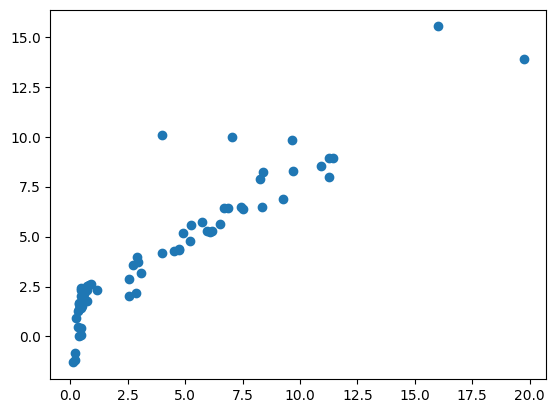

In [41]:
plt.scatter(y_test,pred)
 

In [44]:
import pickle
with open('car_sell_prediction','wb') as f:
    pickle.dump(model,f)

In [46]:
with open('car_sell_prediction','rb') as f:
    mp=pickle.load(f)
t=(2014,5.59,27000,2,0,1,0)
nparr=np.asarray(t)
nparr=nparr.reshape(1,-1)
mp.predict(nparr)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.82765933])